# predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline
from sklearn import preprocessing

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('y',axis=1), df['y'], test_size=.3, random_state = 0)

In [6]:
df = df.replace("unknown", np.NaN)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df = df.dropna()


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [9]:
le = LabelEncoder()

df["job"] = le.fit_transform(df["job"])
df["marital"] = le.fit_transform(df["marital"])
df["education"] = le.fit_transform(df["education"])
df["default"] = le.fit_transform(df["default"])
df["housing"] = le.fit_transform(df["housing"])
df["loan"] = le.fit_transform(df["loan"])
df["contact"] = le.fit_transform(df["contact"])
df["month"] = le.fit_transform(df["month"])
df["day_of_week"] = le.fit_transform(df["day_of_week"])
df["poutcome"] = le.fit_transform(df["poutcome"])
df["y"] = le.fit_transform(df["y"])

<ipython-input-9-fee4e982789a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["job"] = le.fit_transform(df["job"])
<ipython-input-9-fee4e982789a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["marital"] = le.fit_transform(df["marital"])
<ipython-input-9-fee4e982789a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1), df['y'], test_size=.3, random_state = 0)
#for cross validation we do this

In [11]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
#taking a depth of 3 for the decision tree

DecisionTreeClassifier(max_depth=3)

In [12]:
y_pred = model.predict(X_test)

In [13]:
confusion_matrix(y_test,y_pred)

array([[7542,  469],
       [ 466,  670]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8977806931234285

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#to import plot_tree and decision tree classifier we import it from sklearn module

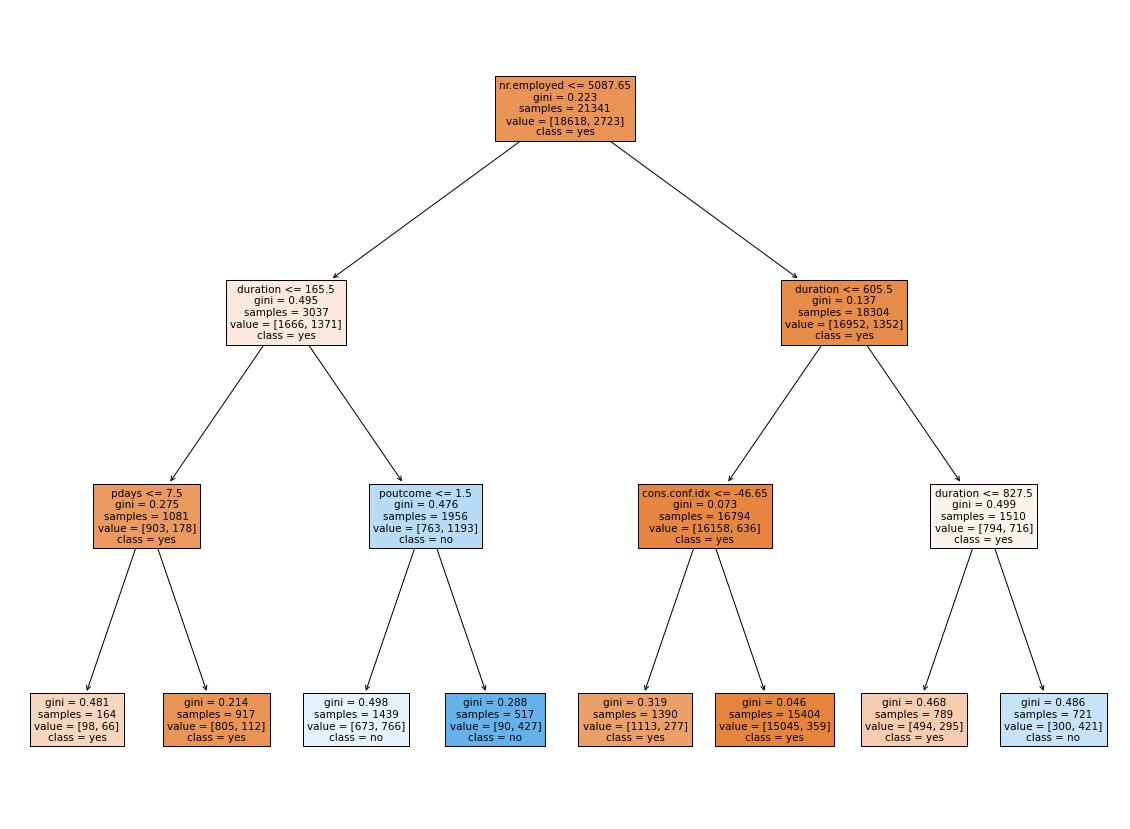

In [16]:
plt.figure(figsize=(20,15))
plot_tree(model,
          feature_names= df.drop('y', axis=1).columns,  
          class_names= ['yes','no'],
          filled=True)
plt.show()
#this is an decision tree by taking 20*15 as size having yes and no as classes
#eurobar3m is taken as root node which means the attribute helps us to split the major part of the data.
#later on second level the  duration. Since we are using entrophy we can say that randomness is less with classification with respect to eurobar3m.
#We can observe the split in the number of samples is evenly done at the level two which suggests that the model is not baised at any levels. i have observed that with the increase int the height of the tree accuracy is increasing this means we are including more nodes and more features.

In [17]:
from statsmodels.graphics.mosaicplot import mosaic

In [20]:
df.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [21]:
data_crosstab = pd.crosstab(df['age'],df['job']) 
print(data_crosstab) 
#contigency table for age and job

job  0   1   2   3   4   5   6   7   8   9   10
age                                            
17    0   0   0   0   0   0   0   0   2   0   0
18    0   0   0   0   0   0   0   0  15   0   0
19    0   0   0   0   0   0   0   0  21   0   0
20    1   5   4   0   0   0   0   2  33   2   0
21   11  13   0   1   0   0   2  11  41   2   3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
88    0   0   0   0   0  22   0   0   0   0   0
89    0   0   0   0   0   2   0   0   0   0   0
91    0   0   0   0   0   2   0   0   0   0   0
94    0   0   0   0   0   1   0   0   0   0   0
95    0   0   0   0   0   1   0   0   0   0   0

[76 rows x 11 columns]


In [22]:
data_crosstab = pd.crosstab(df['month'],df['loan']) 
print(data_crosstab) 
#contigency table for month andd loan

loan      0     1
month            
0      1778   337
1      3982   691
2       125    32
3      4228   853
4      3059   555
5       410    72
6      8189  1544
7      2965   531
8       562    80
9       422    73


In [31]:
import plotly.express as px
fig = px.treemap(df['month'],df['loan'])
fig.show()

In [32]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [36]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas as pd
data = pd.df(age,loan)
mosaic(data,[month])
plt.show()

AttributeError: module 'pandas' has no attribute 'df'

KeyError: "None of [Index(['age', 'month', 'loan'], dtype='object')] are in the [columns]"

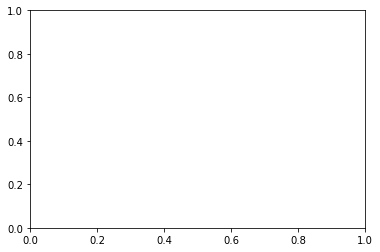

In [38]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns
 
df = sns.load_dataset('tips')
mosaic(df, ['age','month','loan'])
plt.show()